# EquilibriumActor example

In [1]:
using Revise
using FUSE
using Plots; gr();
FUSE.logging(Logging.Info);

┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


WebIO._IJuliaInit()

### Initialize ITER case
[ITER case documentation](https://fuse.help/cases.html#ITER)

### CHEASE equilibrium grid
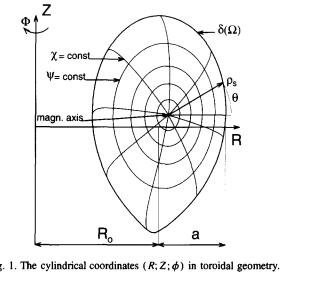

### setting the number of theta grid points to 80 helps with the x-point!

#### OMFIT CHEASE sets it to 40 (this is also the default in the CHEASE source code)

#### only takes 15% more time

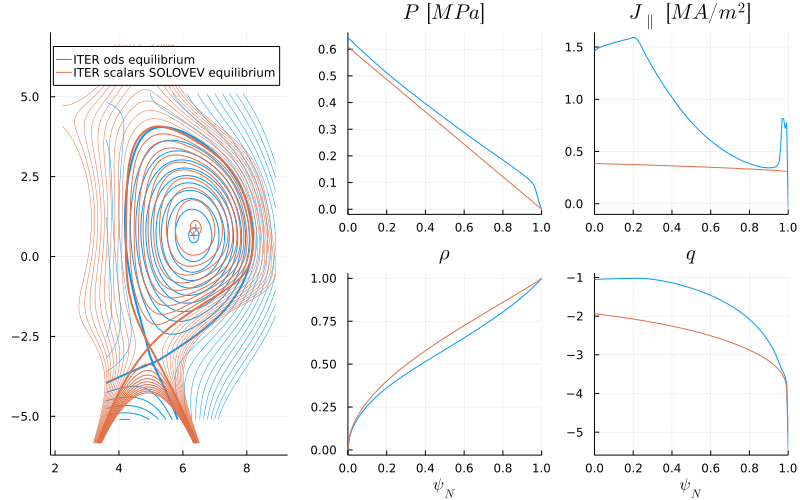

In [78]:
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium")
dd, ini, act = FUSE.init(:ITER, init_from=:scalars);
plot!(eq_plot,dd.equilibrium, label="ITER scalars SOLOVEV equilibrium")

### Setting up the equlibrium actor
The equilibrium actor selects which equilibrium model is used, right now the option are :CHEASE & Solovev

In [4]:
act.ActorEquilibrium.model = :CHEASE

:CHEASE

### Comparing Solovev with CHEASE equilibrium to the original ITER ods equilibrium

┌ Warning: dd.dataset_description was skipped in IMAS data dictionary
└ @ IMASDD ~/.julia/dev/IMASDD/src/data.jl:1136
             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    5.9386734410827119E-002
 minval(EQDSPSI)=   -5.9369945239450793E-002
 maxval(EQDSPSI)=   0.10640987408760438     


g.qpsi[1] = 0.8865517326


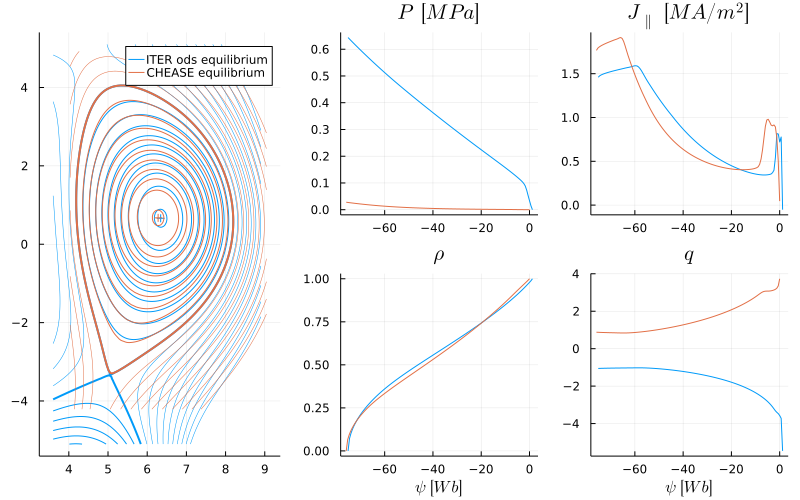

In [2]:
### CHEASE
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium",coordinate=:psi)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary=false
FUSE.ActorEquilibrium(dd,act)
display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium",coordinate=:psi))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium 3"))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium 4"))

### Solovev
#dd, ini, act = FUSE.init(:ITER, init_from=:ods);
#eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium")


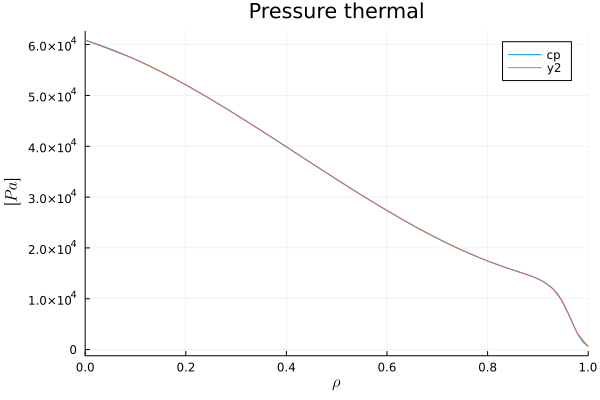

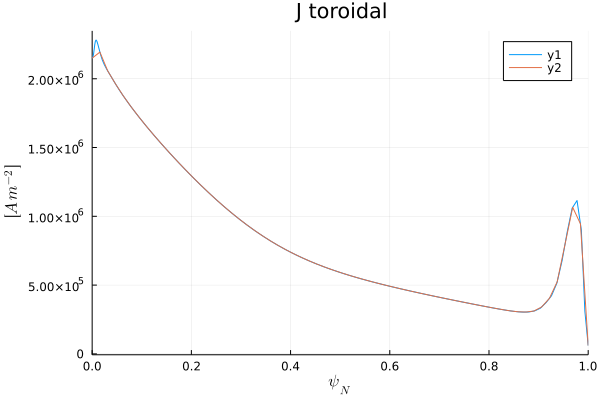

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    3.9539860395381585E-002
 minval(EQDSPSI)=   -3.9522569623930109E-002
 maxval(EQDSPSI)=    9.4499183068631379E-002


g.qpsi[1] = 0.6098099508


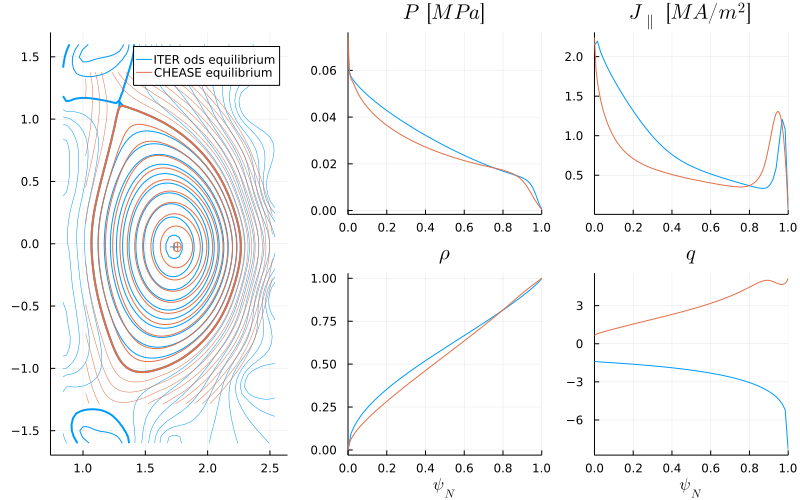

In [27]:
dd, ini, act = FUSE.init(:D3D);
FUSE.ActorSteadyStateCurrent(dd,act)
FUSE.ActorTauenn(dd,act)
FUSE.prepare(dd, :ActorCHEASE, act)


plot(dd.core_profiles.profiles_1d[], :pressure_thermal,label="cp")
display(plot!(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.pressure))
plot(dd.core_profiles.profiles_1d[], :j_tor,coordinate=:psi_norm)
display(plot!(dd.equilibrium.time_slice[].profiles_1d, :j_tor,coordinate=:psi_norm))


eq_plot = plot(dd.equilibrium,coordinate=:psi_norm, label="ITER ods equilibrium")#,coordinate=:rho_tor_norm)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary=false

FUSE.ActorEquilibrium(dd,act)
display(plot!(eq_plot,dd.equilibrium,coordinate=:psi_norm, label="CHEASE equilibrium"))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium,coordinate=:rho_tor_norm, label="CHEASE equilibrium 2"))


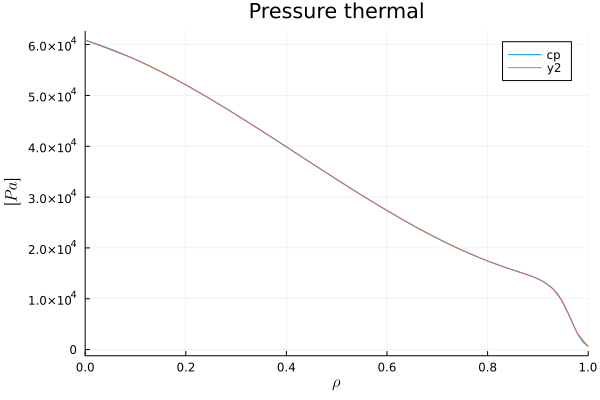

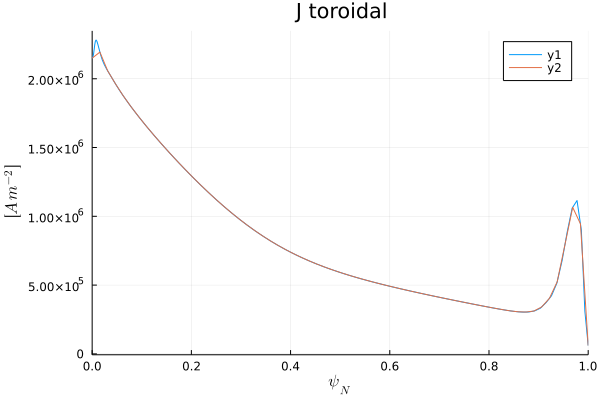

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    3.9539860395381585E-002
 minval(EQDSPSI)=   -3.9522569623930109E-002
 maxval(EQDSPSI)=    9.4499183068631379E-002


g.qpsi[1] = 0.6098099508


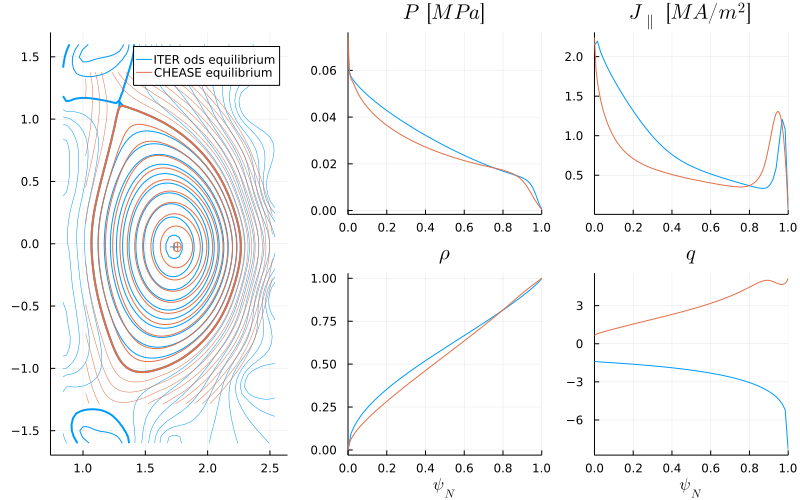

In [29]:
dd, ini, act = FUSE.init(:D3D);
FUSE.ActorSteadyStateCurrent(dd,act)
FUSE.ActorTauenn(dd,act)
FUSE.prepare(dd, :ActorCHEASE, act)


plot(dd.core_profiles.profiles_1d[], :pressure_thermal,label="cp")
display(plot!(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm,dd.equilibrium.time_slice[].profiles_1d.pressure))
plot(dd.core_profiles.profiles_1d[], :j_tor,coordinate=:psi_norm)
display(plot!(dd.equilibrium.time_slice[].profiles_1d, :j_tor,coordinate=:psi_norm))


eq_plot = plot(dd.equilibrium,coordinate=:psi_norm, label="ITER ods equilibrium")#,coordinate=:rho_tor_norm)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary=false

FUSE.ActorEquilibrium(dd,act)
display(plot!(eq_plot,dd.equilibrium,coordinate=:psi_norm, label="CHEASE equilibrium"))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium,coordinate=:rho_tor_norm, label="CHEASE equilibrium 2"))

In [49]:
#dd.equilibrium.time_slice[2].profiles_1d.psi_norm


65-element Vector{Float64}:
 23245.533089562497
 21792.713238988115
 21020.212687356085
 20367.365994628013
 19778.550674571045
 19232.808607809588
 18718.415315450628
 18229.113171577912
 17760.433194394733
 17308.765863535667
 16871.575692945065
 16448.527276257977
 16036.490511252628
     ⋮
  4792.59823403192
  4644.50309426237
  4497.345764209915
  4342.67370011839
  4166.584629401821
  3934.4421523976152
  3599.0522527228213
  3139.9674101570345
  2468.2543570516887
  1703.5386088131916
  1046.9028983306316
   587.4647657999999

In [7]:
### CHEASE
dd, ini, act = FUSE.init(:D3D);
#FUSE.ActorSteadyStateCurrent(dd,act)
#FUSE.prepare(dd, :ActorCHEASE, act)

eq_plot = plot(dd.equilibrium,coordinate=:psi, label="ITER ods equilibrium",coordinate=:psi)#,coordinate=:rho_tor_norm)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary=false

actor_eq = FUSE.ActorEquilibrium(dd,act)
display(plot!(eq_plot,dd.equilibrium,coordinate=:psi, label="CHEASE equilibrium"))


             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    5.0738718557381796E-002
 minval(EQDSPSI)=   -5.0728636554503902E-002
 maxval(EQDSPSI)=    9.6234487315725897E-002


g.qpsi[1] = 0.9496856192


LoadError: BoundsError: attempt to access 65-element Vector{Float64} at index [1:129]

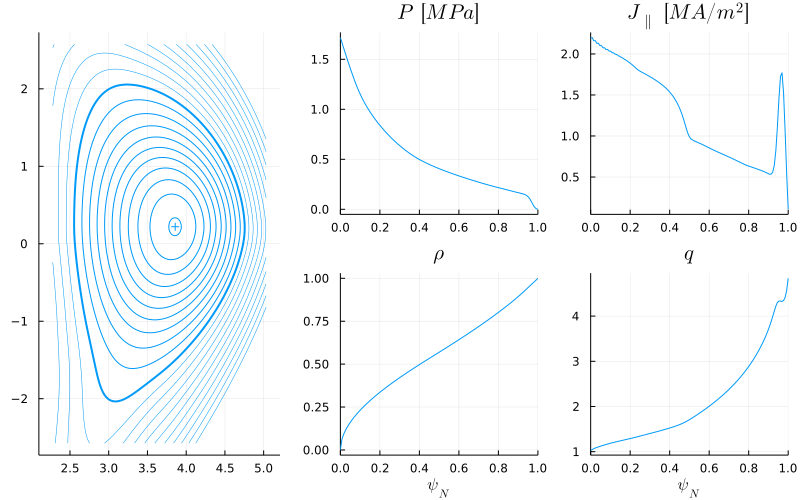

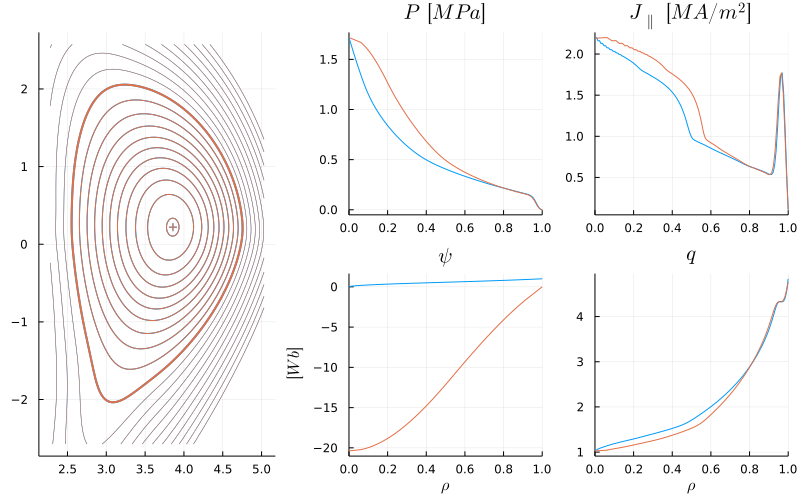

In [23]:
import Equilibrium

dd2= IMAS.json2imas("/Users/slendebroek/.julia/dev/CHEASE/templates/omas_geq.json")
display(plot(dd2.equilibrium))
IMAS.flux_surfaces(dd2.equilibrium)
plot!(dd2.equilibrium,coordinate=:rho_tor_norm)
#FUSE.gEQDSK2IMAS(gfile,dd2.equilibrium)
#display(plot(dd2.equilibrium))

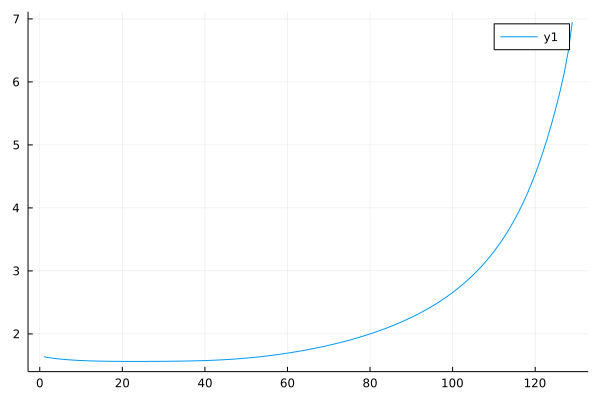

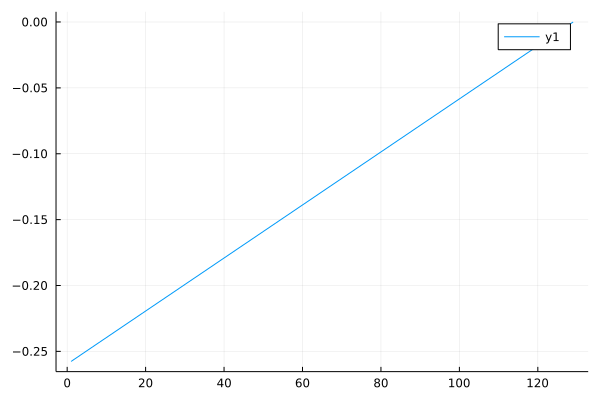

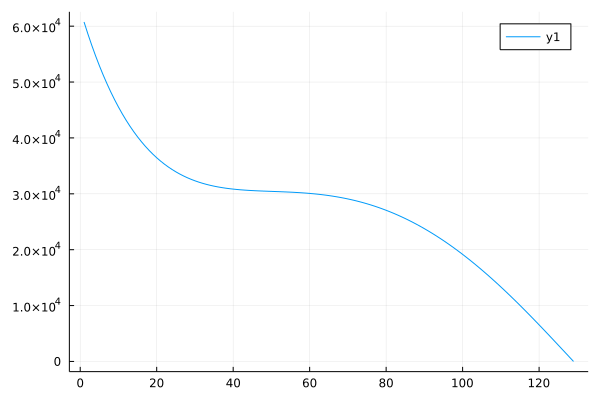

g.qpsi[1] = 1.63702911


LoadError: Bad expression equilibrium.time_slice[2].boundary.geometric_axis.r
Bad expression equilibrium.time_slice[2].profiles_1d.geometric_axis.r
equilibrium.time_slice[2].profiles_1d.r_outboard is missing

In [15]:
import Equilibrium
using Plots
using FUSE
gfile_pp = Equilibrium.readg("/Users/slendebroek/.julia/dev/VacuumFields/test/equilibria/g150219.03200_fix") # pp
gfile_np = Equilibrium.readg("/Users/slendebroek/.julia/dev/VacuumFields/test/equilibria/g133221.01151_fix")
gfile_nn = Equilibrium.readg("/Users/slendebroek/.julia/dev/VacuumFields/test/equilibria/g153298.04400_fix")

display(plot(gfile_nn.qpsi))
display(plot(gfile_nn.psi))
display(plot(gfile_nn.pres))
#display(plot(gfile_pp.qpsi))

dd, ini, act = FUSE.init(:D3D);
resize!(dd.equilibrium.time_slice,1.0)
#dd.equilibrium.time_slice.time[1]=1


FUSE.gEQDSK2IMAS(gfile_nn,dd.equilibrium)


plot(dd.equilibrium,coordinate=:rho_tor_norm)


In [8]:
### CHEASE
dd, ini, act = FUSE.init(:FPP,version=:v1_demount, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="FPP ODS eq")
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary=false

FUSE.ActorEquilibrium(dd,act)
display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium"))

#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium"))


             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    6.3697465558745350E-002
 minval(EQDSPSI)=   -6.3687241377707551E-002
 maxval(EQDSPSI)=   0.11994979252968573     


g.qpsi[1] = 0.3677673705


LoadError: BoundsError: attempt to access 33-element Vector{Float64} at index [1:129]

### Starting from scalars and running CHEASE

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    5.5026231659886377E-002
 minval(EQDSPSI)=   -5.5020921090350595E-002
 maxval(EQDSPSI)=   0.12173120063580448     


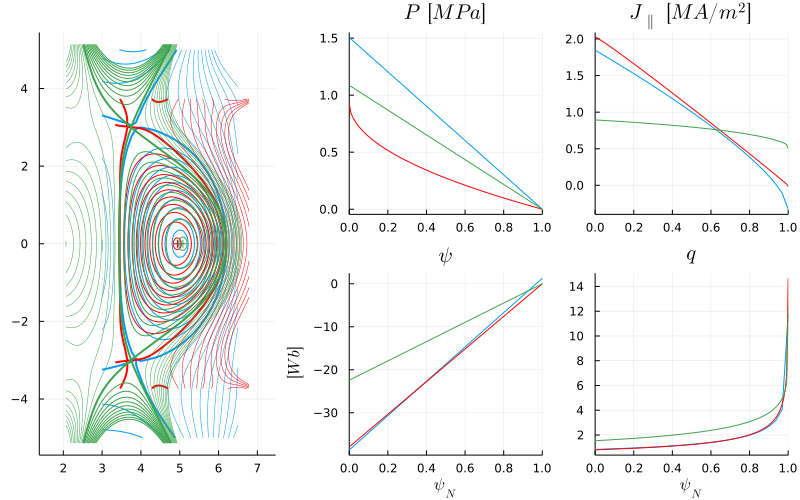

In [6]:
dd, ini, act = FUSE.init(:FPP,version=:v1_demount, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="FPP ODS eq")

# CHEASE deadstart
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:FPP,version=:v1_demount, init_from=:scalars);
act.ActorEquilibrium.model = :CHEASE
dd = FUSE.init(dd,ini,act)
plot!(eq_plot, dd.equilibrium,label="CHEASE deadstart",color=:red)

# Solvev from scalars
ini, act = FUSE.case_parameters(:FPP,version=:v1_demount, init_from=:scalars);
act.ActorEquilibrium.model = :Solovev
dd= FUSE.init(dd,ini,act)
display(plot!(eq_plot, dd.equilibrium,label="Solvev deadstart"))

### Finding a MXH parameterization of the boundary for ITER

round.(flat_coeffs(mxh), digits = 5) = [6.19245, 0.39528, 0.32331, 1.82302, 0.00337, 0.15912, -0.05842, -0.04573, 0.00694, 0.00614, 0.00183, 0.43714, 0.09583, -0.05597, -0.01655, 0.00204, 0.00306]


┌ Warning: Skipped marker arg x.
└ @ Plots ~/.julia/packages/Plots/E2187/src/args.jl:1221


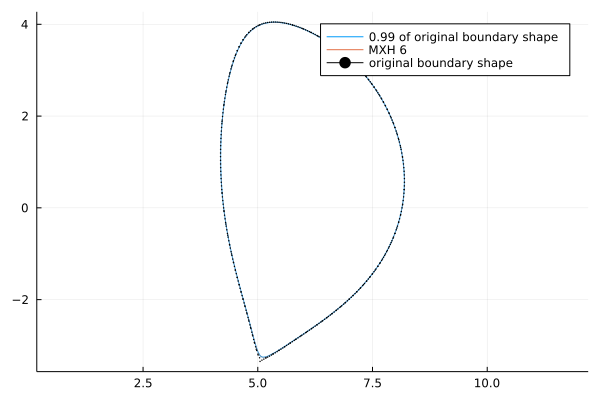

In [7]:
import MillerExtendedHarmonic:flat_coeffs
dd, ini, act = FUSE.init(:ITER,init_from=:ods);
eqt = dd.equilibrium.time_slice[]
eqt_bound= eqt.boundary.outline
psi_close = (eqt.profiles_1d.psi[end-1] + 5 * eqt.profiles_1d.psi[end]) / 6 
r_bound,z_bound = IMAS.flux_surface(eqt,  psi_close)

eq_plot = plot(r_bound,z_bound,label="0.99 of original boundary shape")
for order in [6]
    mxh = IMAS.MXH(r_bound,z_bound,order)
    @show round.(flat_coeffs(mxh),digits=5)
    plot!(mxh,label="MXH $order",lw=0.3)
end
display(plot!(eqt_bound.r,eqt_bound.z,label="original boundary shape",color="black",marker="x",lw=0,markersize=1))

## Comparing CHEASE deadstart from MXH parameterization vs Miller parameterization

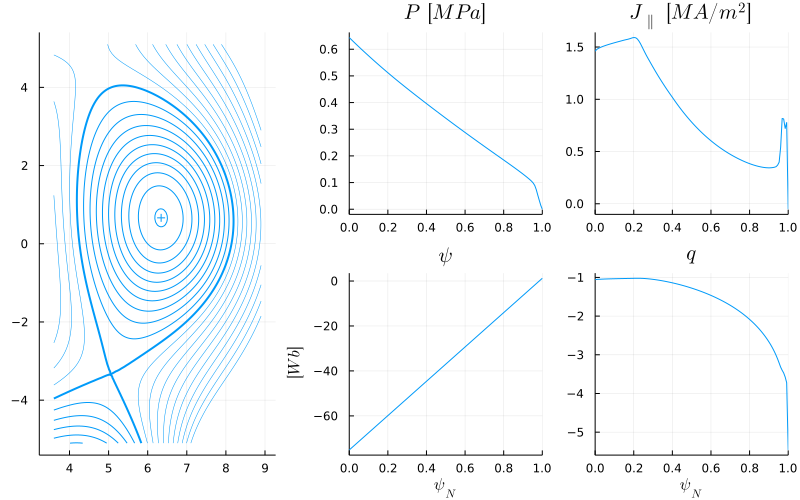

             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    6.6117377189637574E-002
 minval(EQDSPSI)=   -6.6115885625986720E-002
 maxval(EQDSPSI)=   0.11797968792904796     
             now will see if namelist given in file: 'chease_namelist'
  parameters not associated
 NITMOPT =            0
  k1=          182  k2=           40
 eqchease_out(index_out)%profiles_1d%psi(1)=    0.0000000000000000     
 eqchease_out(index_out)%profiles_1d%psi(nbprofiles1d)=    6.4629459878429329E-002
 minval(EQDSPSI)=   -6.4629139307310679E-002
 maxval(EQDSPSI)=   0.11596513838711442     


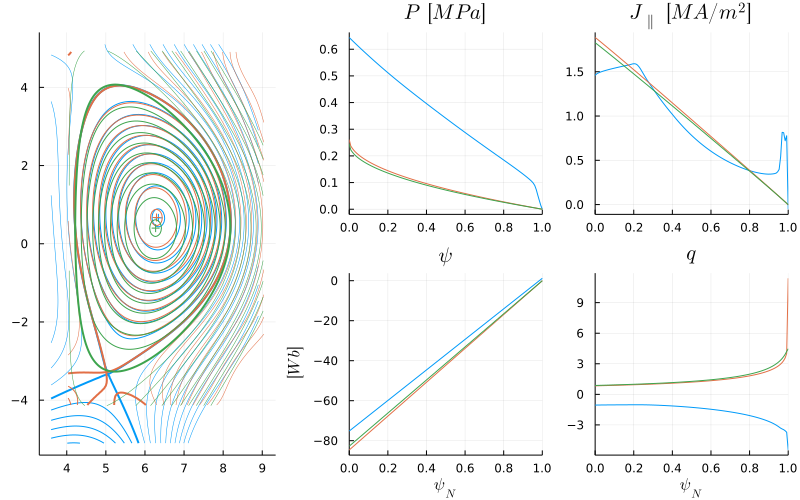

In [9]:
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="ITER ODS eq")
display(eq_plot)

# CHEASE deadstart MXH
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :MXH_params
act.ActorEquilibrium.model = :CHEASE
dd = FUSE.init(dd,ini,act)
plot!(eq_plot, dd.equilibrium,label="CHEASE deadstart MXH")

# CHEASE deadstart MILLER
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :scalars
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary=false
dd = FUSE.init(dd,ini,act)
display(plot!(eq_plot, dd.equilibrium,label="CHEASE deadstart Miller"))

